### Geopandas
[공식 document](https://geopandas.org/en/stable/)
1. within : 포함되는지 여부
2. contains : 포함하고 있는지 여부
3. intersects : 교차 여부 (경계에 닿아 있기만 해도 좋다)
4. crosses : 교차 여부 (내부를 지나가는)
5. distance : 두 공간 객체 사이의 직선(최단)거리 계산

In [6]:
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# path = './데이터'
# all_files = os.listdir(path)
# csv_files = [f for f in all_files if f.endswith('.csv')]

# dataframes = [pd.read_csv(os.path.join(path, f)) for f in csv_files]

# df = pd.concat(dataframes, ignore_index=True)
# print(df.shape)
# df.head()

In [10]:
lon = 'longitude'
lat = 'latitude'

In [11]:
cond1 = (df[lon] < 128.60) & (df[lon]>123.05)
cond2 = (df[lat] < 33.56) & (df[lat] >33)

df_2 = df[cond1 & cond2]
df_2.reset_index(drop=True, inplace=True)

In [15]:
def get_transform(df: pd.DataFrame, lat='latitude', lon='longitude'):
    # csv to geopandas
    # lon, lat, data geometry로 변경한다
    df[lat] = df[lat].astype(float)
    df[lon] = df[lon].astype(float)
    df['geometry'] = df.apply(lambda row: Point([row[lon], row[lat]]), axis=1)
    DataFrame = gpd.GeoDataFrame(df, geometry='geometry')
    DataFrame.crs = {'init': 'epsg:5179'}
    DataFrame = DataFrame.to_crs({'init':'epsg:5179'}) # 좌표계 epsg: 4326
    return DataFrame

In [16]:
df_2

,oid,collection_dt,longitude,latitude,time,Diff,geometry
0,46100025,20210501112730,126.529756,33.511141,2021-05-01 11:27:30,2279.0,POINT (126.52976 33.51114)
1,46100025,20210501131830,126.508146,33.516195,2021-05-01 13:18:30,1895.0,POINT (126.50815 33.51620)
2,46100025,20210501142030,126.492275,33.495973,2021-05-01 14:20:30,593402.0,POINT (126.49228 33.49597)
3,46100025,20210508113430,126.915050,33.450817,2021-05-08 11:34:30,2159.0,POINT (126.91505 33.45082)
4,46100025,20210508123030,126.778668,33.443488,2021-05-08 12:30:30,5398.0,POINT (126.77867 33.44349)
...,...,...,...,...,...,...,...
380041,46101bc2,20210313174500,126.430855,33.238272,2021-03-13 17:45:00,2250.0,POINT (126.43085 33.23827)
380042,46101bc2,20210313192430,126.833729,33.323197,2021-03-13 19:24:30,1178357.0,POINT (126.83373 33.32320)
380043,46101bc2,20210327115230,126.506827,33.516312,2021-03-27 11:52:30,6467.0,POINT (126.50683 33.51631)
380044,46101bc2,20210327143230,126.498082,33.504243,2021-03-27 14:32:30,4746.0,POINT (126.49808 33.50424)


In [19]:
df_2.to_csv('./데이터/체류거점_2021.csv', index=False)

In [17]:
geo = get_transform(df_2, lat='latitude', lon='longitude')
geo

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/dabs/.conda/envs/InHeon/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,oid,collection_dt,longitude,latitude,time,Diff,geometry
0,46100025,20210501112730,126.529756,33.511141,2021-05-01 11:27:30,2279.0,POINT (126.530 33.511)
1,46100025,20210501131830,126.508146,33.516195,2021-05-01 13:18:30,1895.0,POINT (126.508 33.516)
2,46100025,20210501142030,126.492275,33.495973,2021-05-01 14:20:30,593402.0,POINT (126.492 33.496)
3,46100025,20210508113430,126.915050,33.450817,2021-05-08 11:34:30,2159.0,POINT (126.915 33.451)
4,46100025,20210508123030,126.778668,33.443488,2021-05-08 12:30:30,5398.0,POINT (126.779 33.443)
...,...,...,...,...,...,...,...
380041,46101bc2,20210313174500,126.430855,33.238272,2021-03-13 17:45:00,2250.0,POINT (126.431 33.238)
380042,46101bc2,20210313192430,126.833729,33.323197,2021-03-13 19:24:30,1178357.0,POINT (126.834 33.323)
380043,46101bc2,20210327115230,126.506827,33.516312,2021-03-27 11:52:30,6467.0,POINT (126.507 33.516)
380044,46101bc2,20210327143230,126.498082,33.504243,2021-03-27 14:32:30,4746.0,POINT (126.498 33.504)


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


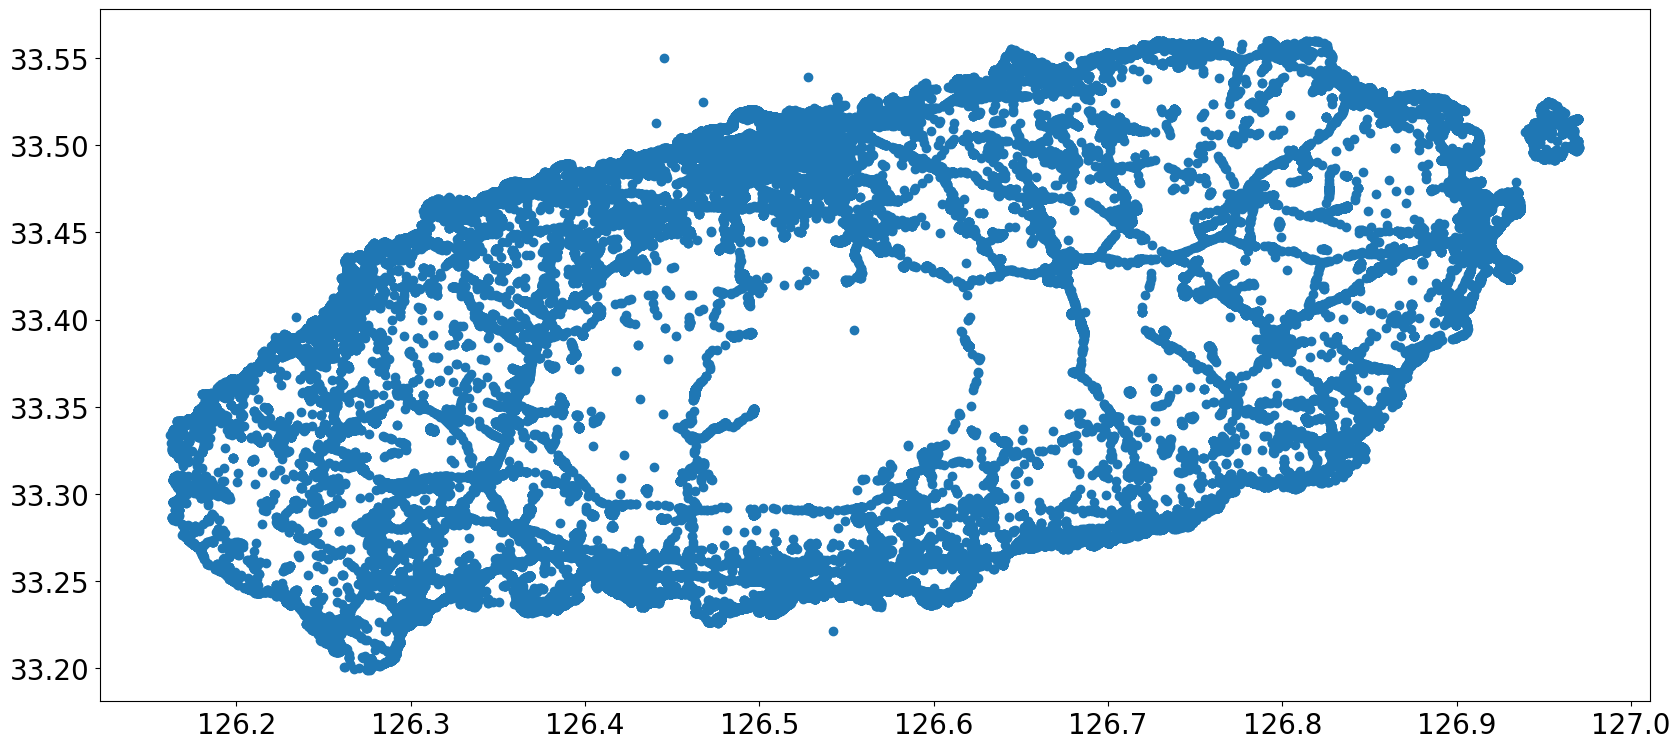

In [18]:
geo.plot(figsize=(20, 20))
plt.show()

In [21]:
import folium
latitude = df_2[lat].mean()
longitude = df_2[lon].mean()

m = folium.Map(location=[latitude, longitude],
               zoom_start=17,
               width=750,
               height=500)

In [28]:
sub_df = df_2.iloc[:, [0, 2, 3]]
sub_df

,oid,longitude,latitude
0,46100025,126.529756,33.511141
1,46100025,126.508146,33.516195
2,46100025,126.492275,33.495973
3,46100025,126.915050,33.450817
4,46100025,126.778668,33.443488
...,...,...,...
380041,46101bc2,126.430855,33.238272
380042,46101bc2,126.833729,33.323197
380043,46101bc2,126.506827,33.516312
380044,46101bc2,126.498082,33.504243


In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15
)

coords = sub_df[['latitude', 'longitude']]

marker_cluster = MarkerCluster().add_to(m)
for lat, long in zip(coords['latitude'], coords['longitude']):
    folium.Marker([lat, long], icon= folium.Icon(color='green')).add_to(marker_cluster)
m

In [77]:
m.save('map.html')

In [62]:
df_2 = pd.read_csv('./데이터/체류거점_2021.csv')

In [63]:
df_2.iloc[:, 4] = pd.to_datetime(df_2['time'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380046 entries, 0 to 380045
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   oid            380046 non-null  object        
 1   collection_dt  380046 non-null  int64         
 2   longitude      380046 non-null  float64       
 3   latitude       380046 non-null  float64       
 4   time           380046 non-null  datetime64[ns]
 5   Diff           380046 non-null  float64       
 6   geometry       380046 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 20.3+ MB


In [64]:
df_2['Month'] = df_2['time'].dt.month
df_2['day'] = df_2['time'].dt.day
df_2['hour'] = df_2['time'].dt.hour

df_2

,oid,collection_dt,longitude,latitude,time,Diff,geometry,Month,day,hour
0,46100025,20210501112730,126.529756,33.511141,2021-05-01 11:27:30,2279.0,POINT (126.529756 33.511141),5,1,11
1,46100025,20210501131830,126.508146,33.516195,2021-05-01 13:18:30,1895.0,POINT (126.508146 33.516195),5,1,13
2,46100025,20210501142030,126.492275,33.495973,2021-05-01 14:20:30,593402.0,POINT (126.492275 33.495973),5,1,14
3,46100025,20210508113430,126.915050,33.450817,2021-05-08 11:34:30,2159.0,POINT (126.91505 33.450817),5,8,11
4,46100025,20210508123030,126.778668,33.443488,2021-05-08 12:30:30,5398.0,POINT (126.778668 33.443488),5,8,12
...,...,...,...,...,...,...,...,...,...,...
380041,46101bc2,20210313174500,126.430855,33.238272,2021-03-13 17:45:00,2250.0,POINT (126.430855 33.238272),3,13,17
380042,46101bc2,20210313192430,126.833729,33.323197,2021-03-13 19:24:30,1178357.0,POINT (126.833729 33.323197),3,13,19
380043,46101bc2,20210327115230,126.506827,33.516312,2021-03-27 11:52:30,6467.0,POINT (126.506827 33.516312),3,27,11
380044,46101bc2,20210327143230,126.498082,33.504243,2021-03-27 14:32:30,4746.0,POINT (126.498082 33.504243),3,27,14


In [65]:
df_2 = df_2.sort_values(by=['Month', 'day'])

In [70]:
df_2

,oid,collection_dt,longitude,latitude,time,Diff,geometry,Month,day,hour
252852,4610004e,20210102103500,126.328041,33.463538,2021-01-02 10:35:00,12217.0,POINT (126.328041 33.463538),1,2,10
252853,4610004e,20210102142830,126.486406,33.502908,2021-01-02 14:28:30,3884.0,POINT (126.486406 33.502908),1,2,14
252854,4610004e,20210102155100,126.523459,33.501469,2021-01-02 15:51:00,2790.0,POINT (126.523459 33.501469),1,2,15
252855,4610004e,20210102164900,126.478646,33.487600,2021-01-02 16:49:00,3155.0,POINT (126.478646 33.4876),1,2,16
252856,4610004e,20210102174930,126.472746,33.480436,2021-01-02 17:49:30,3066.0,POINT (126.472746 33.480436),1,2,17
...,...,...,...,...,...,...,...,...,...,...
93437,46101b98,20211225142330,126.311383,33.461657,2021-12-25 14:23:30,2083.0,POINT (126.311383 33.461657),12,25,14
93438,46101b98,20211225151330,126.309605,33.463999,2021-12-25 15:13:30,4517.0,POINT (126.309605 33.463999),12,25,15
93458,46101bc2,20211225112030,126.241503,33.392525,2021-12-25 11:20:30,4479.0,POINT (126.241503 33.392525),12,25,11
93459,46101bc2,20211225135100,126.454797,33.465242,2021-12-25 13:51:00,6420.0,POINT (126.454797 33.465242),12,25,13


In [73]:
bins = [0, 12, 18, 24] # 구간 경계 설정
labels = [0, 1, 2] # 0: "Morning", 1: "Afternoon", 2: "Evening"

df_2['time_of_day'] = pd.cut(df_2['hour'], bins=bins, labels=labels, right=False)
df_2['time_of_day'].value_counts()

1    196920
0     99225
2     83901
Name: time_of_day, dtype: int64

In [74]:
df_2

,oid,collection_dt,longitude,latitude,time,Diff,geometry,Month,day,hour,time_of_day
252852,4610004e,20210102103500,126.328041,33.463538,2021-01-02 10:35:00,12217.0,POINT (126.328041 33.463538),1,2,10,0
252853,4610004e,20210102142830,126.486406,33.502908,2021-01-02 14:28:30,3884.0,POINT (126.486406 33.502908),1,2,14,1
252854,4610004e,20210102155100,126.523459,33.501469,2021-01-02 15:51:00,2790.0,POINT (126.523459 33.501469),1,2,15,1
252855,4610004e,20210102164900,126.478646,33.487600,2021-01-02 16:49:00,3155.0,POINT (126.478646 33.4876),1,2,16,1
252856,4610004e,20210102174930,126.472746,33.480436,2021-01-02 17:49:30,3066.0,POINT (126.472746 33.480436),1,2,17,1
...,...,...,...,...,...,...,...,...,...,...,...
93437,46101b98,20211225142330,126.311383,33.461657,2021-12-25 14:23:30,2083.0,POINT (126.311383 33.461657),12,25,14,1
93438,46101b98,20211225151330,126.309605,33.463999,2021-12-25 15:13:30,4517.0,POINT (126.309605 33.463999),12,25,15,1
93458,46101bc2,20211225112030,126.241503,33.392525,2021-12-25 11:20:30,4479.0,POINT (126.241503 33.392525),12,25,11,0
93459,46101bc2,20211225135100,126.454797,33.465242,2021-12-25 13:51:00,6420.0,POINT (126.454797 33.465242),12,25,13,1


In [76]:
df_3 = df_2.drop(['collection_dt', 'time'], axis=1)
df_3.to_csv('체류거점_2021.csv', index=False)